In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy
numpy.version.version

'1.19.5'

In [3]:
df=pd.read_csv('car_evaluation.csv',header=None)

### Exploratory data analysis 

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
col_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns= col_names

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [8]:
df.shape

(1728, 7)

In [9]:
# To get 10 random rows
df.sample(n = 10)

,buying,maint,doors,persons,lug_boot,safety,class
1321,low,vhigh,2,more,big,med,acc
487,high,vhigh,4,2,small,med,unacc
1014,med,high,3,4,big,low,unacc
256,vhigh,med,3,4,med,med,unacc
1221,med,low,3,2,big,low,unacc
1192,med,low,2,2,med,med,unacc
573,high,high,3,2,big,low,unacc
1647,low,low,3,2,small,low,unacc
688,high,med,3,4,med,med,unacc
555,high,high,2,4,big,low,unacc


In [10]:
#View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df['buying'].value_counts()

med      432
high     432
vhigh    432
low      432
Name: buying, dtype: int64

In [12]:
df['maint'].value_counts()

med      432
high     432
vhigh    432
low      432
Name: maint, dtype: int64

In [13]:
df['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [14]:
df['persons'].value_counts()

more    576
2       576
4       576
Name: persons, dtype: int64

In [15]:
df['lug_boot'].value_counts()

small    576
med      576
big      576
Name: lug_boot, dtype: int64

In [16]:
df['safety'].value_counts()

med     576
high    576
low     576
Name: safety, dtype: int64

In [17]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### Data Preprocessing 

In [18]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [19]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [20]:
df.duplicated().sum()

0

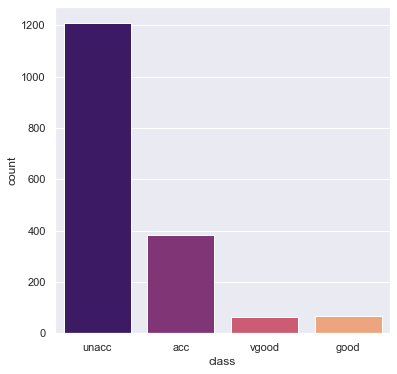

In [62]:
sns.countplot(x = 'class', data = df, palette = 'magma')
sns.set(rc = {'figure.figsize':(6,8)})

### Feature Engineering 

In [23]:
# encode variables with ordinal encoding
from sklearn.preprocessing import OrdinalEncoder 


encoder = OrdinalEncoder()
df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']] = encoder.fit_transform(df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])


In [24]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,unacc
1,3.0,3.0,0.0,0.0,2.0,2.0,unacc
2,3.0,3.0,0.0,0.0,2.0,0.0,unacc
3,3.0,3.0,0.0,0.0,1.0,1.0,unacc
4,3.0,3.0,0.0,0.0,1.0,2.0,unacc


### Declare dependent variable and target variable 

In [25]:
x = df.drop(['class'], axis=1)

y = df['class']

In [26]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [27]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

### Split data set into separate training and test set 

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=7)

In [29]:
x_train.shape,y_train.shape

((1382, 6), (1382,))

In [30]:
x_test.shape,y_test.shape

((346, 6), (346,))

In [31]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [32]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
451,0.0,3.0,0.0,2.0,2.0,2.0
1150,2.0,2.0,2.0,1.0,0.0,2.0
377,3.0,1.0,1.0,2.0,0.0,0.0
756,0.0,1.0,0.0,0.0,2.0,1.0
46,3.0,3.0,1.0,2.0,2.0,2.0


In [33]:
y_train.head()

451     unacc
1150      acc
377       acc
756     unacc
46      unacc
Name: class, dtype: object

### Decision Tree Classifier

### Decision Tree Classifier with criterion gini index

In [86]:
from sklearn.tree import DecisionTreeClassifier  
 

gini_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
gini_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [65]:
y_pred_gini= gini_classifier.predict(x_test)  


In [77]:
print('Model accuracy score with criterion gini index: ', gini_classifier.score(x_test,y_test))


Model accuracy score with criterion gini index:  0.8121387283236994


In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gini)
cm

array([[ 70,   0,   7,   0],
       [  8,   0,   0,   0],
       [ 35,   0, 211,   0],
       [ 15,   0,   0,   0]], dtype=int64)

<AxesSubplot:>

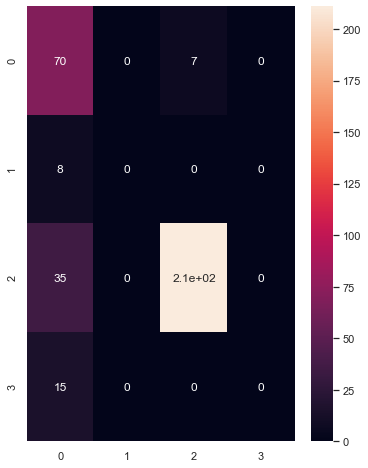

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred_gini),annot=True)

### Check for overfitting and underfitting

In [78]:
print('Training set score: ',gini_classifier.score(x_train, y_train))

print('Test set score: ',gini_classifier.score(x_test,y_test))

Training set score:  0.7720694645441389
Test set score:  0.8121387283236994


#### Here, the training-set accuracy score is 0.77 while the test-set accuracy to be 0.81. These two values are quite comparable. So, there is no sign of overfitting.

### Visualize decision-trees

[Text(209.25, 475.65000000000003, 'X[3] <= 0.5\ngini = 0.461\nsamples = 1382\nvalue = [307, 61, 964, 50]'),
 Text(139.5, 339.75, 'gini = 0.0\nsamples = 449\nvalue = [0, 0, 449, 0]'),
 Text(279.0, 339.75, 'X[5] <= 0.5\ngini = 0.58\nsamples = 933\nvalue = [307, 61, 515, 50]'),
 Text(139.5, 203.85000000000002, 'X[1] <= 2.5\ngini = 0.635\nsamples = 298\nvalue = [158, 24, 66, 50]'),
 Text(69.75, 67.94999999999999, 'gini = 0.627\nsamples = 219\nvalue = [119, 24, 26, 50]'),
 Text(209.25, 67.94999999999999, 'gini = 0.5\nsamples = 79\nvalue = [39, 0, 40, 0]'),
 Text(418.5, 203.85000000000002, 'X[5] <= 1.5\ngini = 0.442\nsamples = 635\nvalue = [149, 37, 449, 0]'),
 Text(348.75, 67.94999999999999, 'gini = 0.0\nsamples = 310\nvalue = [0, 0, 310, 0]'),
 Text(488.25, 67.94999999999999, 'gini = 0.594\nsamples = 325\nvalue = [149, 37, 139, 0]')]

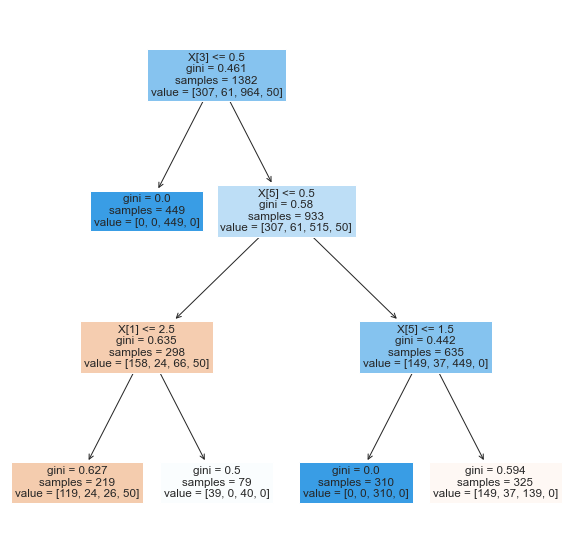

In [83]:

from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(gini_classifier,filled=True)

In [44]:
print(tree.export_text(classifier))

|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: acc
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: unacc
|   |--- feature_5 >  0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- class: unacc
|   |   |--- feature_5 >  1.50
|   |   |   |--- class: acc



In [80]:
x_test.head(1)

,buying,maint,doors,persons,lug_boot,safety
704,0.0,2.0,2.0,0.0,2.0,0.0


In [81]:
y_test.head(1)

704    unacc
Name: class, dtype: object

In [82]:
gini_classifier.predict([[0.0,2.0,2.0,0.0,2.0,0.0]])

array(['unacc'], dtype=object)

## Decision Tree Classifier with criterion entropy

In [85]:
en_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
en_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [87]:
y_pred_en= en_classifier.predict(x_test)  


In [88]:
print('Model accuracy score with criterion entropy : ', en_classifier.score(x_test,y_test))


Model accuracy score with criterion entropy :  0.8121387283236994


In [89]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_en)
cm

array([[ 70,   0,   7,   0],
       [  8,   0,   0,   0],
       [ 35,   0, 211,   0],
       [ 15,   0,   0,   0]], dtype=int64)

<AxesSubplot:>

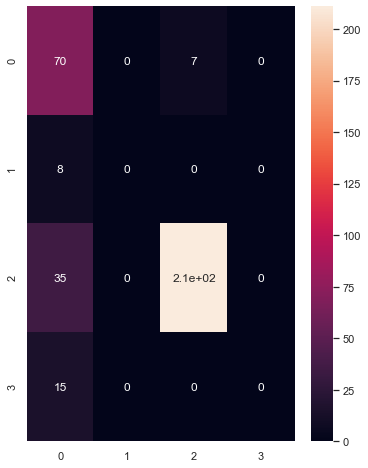

In [90]:
sns.heatmap(confusion_matrix(y_test,y_pred_en),annot=True)

### Check for overfitting and underfitting

In [91]:
print('Training set score: ',en_classifier.score(x_train, y_train))

print('Test set score: ',en_classifier.score(x_test,y_test))

Training set score:  0.7720694645441389
Test set score:  0.8121387283236994


### Visualize decision-trees


[Text(209.25, 475.65000000000003, 'X[3] <= 0.5\nentropy = 1.217\nsamples = 1382\nvalue = [307, 61, 964, 50]'),
 Text(139.5, 339.75, 'entropy = 0.0\nsamples = 449\nvalue = [0, 0, 449, 0]'),
 Text(279.0, 339.75, 'X[5] <= 0.5\nentropy = 1.484\nsamples = 933\nvalue = [307, 61, 515, 50]'),
 Text(139.5, 203.85000000000002, 'X[1] <= 2.5\nentropy = 1.692\nsamples = 298\nvalue = [158, 24, 66, 50]'),
 Text(69.75, 67.94999999999999, 'entropy = 1.679\nsamples = 219\nvalue = [119, 24, 26, 50]'),
 Text(209.25, 67.94999999999999, 'entropy = 1.0\nsamples = 79\nvalue = [39, 0, 40, 0]'),
 Text(418.5, 203.85000000000002, 'X[5] <= 1.5\nentropy = 1.083\nsamples = 635\nvalue = [149, 37, 449, 0]'),
 Text(348.75, 67.94999999999999, 'entropy = 0.0\nsamples = 310\nvalue = [0, 0, 310, 0]'),
 Text(488.25, 67.94999999999999, 'entropy = 1.397\nsamples = 325\nvalue = [149, 37, 139, 0]')]

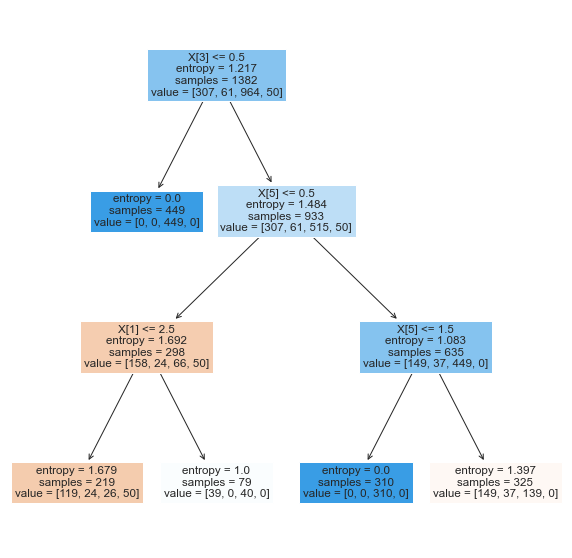

In [92]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(en_classifier,filled=True)

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.55      0.91      0.68        77
        good       0.00      0.00      0.00         8
       unacc       0.97      0.86      0.91       246
       vgood       0.00      0.00      0.00        15

    accuracy                           0.81       346
   macro avg       0.38      0.44      0.40       346
weighted avg       0.81      0.81      0.80       346



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
